## light example
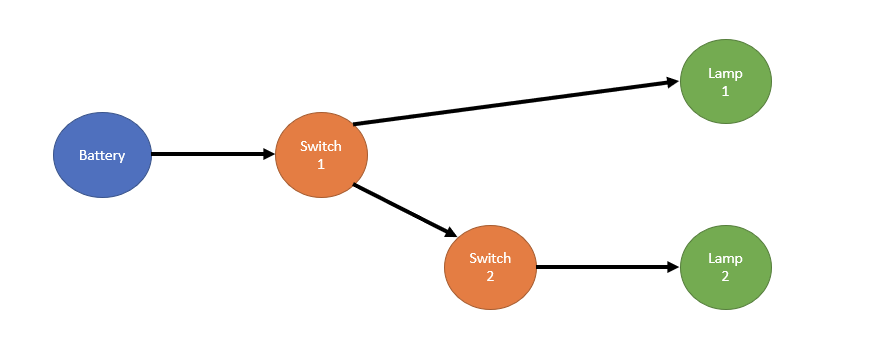


#### Possible causes and their prior probabilities:
- Battery is flat (0.2)
- Switch 1 is in wrong position (0.5)
- Switch 2 is in wrong position (0.5)
- Lamp 1 is broken (0.1)
- Lamp 2 is broken (0.1) 

assumption: lamp states are on or off or broken

#### Possible actions and their costs:
- Measure battery (3)
- Replace battery (5)
- Toggle switch 1 (2)
- Toggle switch 2 (2)
- Observe lamp 1 (1)
- Observe lamp 2 (1)
- Replace lamp 1 (6)
- Replace lamp 2 (6

#### Scenario:
- I need lamp 2 to be on but is not.

#### Question:
- What is the best series of actions I should take?


In [ ]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [ ]:
# create influence diagram
diag = gum.InfluenceDiagram()

# Structure

chance, decision and utility variables

L1: light 1 
- normal behavior is light 1 is on 
- but can also be off

L1H: light 1 health 
- models if light is broken. 
- If L1H set to broken light 1 will be off. 
- So light 1 is conditionally dependent on L1H

In [ ]:
# L1 and L1H
L1 = diag.addChanceNode(gum.LabelizedVariable('L1', 'L1', ["on", "off"]))
L1H = diag.addChanceNode(gum.LabelizedVariable('L1H', 'L1 health', ["ok", "broken"]))

# L1 is conditionally dependent on L1H
diag.addArc(L1H, L1)

S1: toggle for light 1
- since L1 normally on S1 also normally on
- when off L1 should be off
- when off but L1 on: weird situation
- when on but L1 off: probably broken
- L1 is conditionally dependent on S1 

In [ ]:
# S1 and S1H
S1 = diag.addChanceNode(gum.LabelizedVariable('S1', 'S1', ["on", "off"]))
S1H = diag.addChanceNode(gum.LabelizedVariable('S1H', 'S1 health', ['ok', 'broken']))

# L1 is dependent on S1
diag.addArc(S1, L1)
diag.addArc(S1H, S1)

DT1: test 1
- decision variable test 1 determines if test 1 will be performed
- values are yes / no
- if L1H is likely broken DT1 becomes relevant

RT1: test result of test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DT1 set to no

UT1: utility of test 1
- function of L1H and DT1 
- when low health it's likely to perform test for more assurance

In [ ]:
DT1 = diag.addDecisionNode(gum.LabelizedVariable('DT1', 'Decide T1', ["yes", "no"]))
RT1 = diag.addChanceNode(gum.LabelizedVariable('RT1', 'Result T1', ["not done", "OK", "broken"]))
UT1 = diag.addUtilityNode(gum.LabelizedVariable("UT1", "R(L1H, DT1)", 1))

In [ ]:
diag.addArc(L1H, DT1)
diag.addArc(L1H, UT1)
diag.addArc(DT1, UT1)
diag.addArc(DT1, RT1)

DT2 test 2
- decision variable test 2 determines if test 2 will be performed
- values are yes / no
- if L1H is likely broken DT1 becomes relevant

RT2: test result of test 2
- chance variable test 2 result models outcome of test 2: OK, not OK
- not done is also an option if DT2 set to no

UT2: utility of test 1
- function of RT1 and DT2 
- when low health it's likely to perform test for more assurance

In [ ]:
DT2 = diag.addDecisionNode(gum.LabelizedVariable('DT2', 'Decide T2', ["yes", "no"]))
RT2 = diag.addChanceNode(gum.LabelizedVariable('RT2', 'Result T2', ["not done", "OK", "broken"]))
UT2 = diag.addUtilityNode(gum.LabelizedVariable("UT2", "R(L1H, DT2)", 1))

In [ ]:
diag.addArc(RT1, DT2)
diag.addArc(DT2, UT2)
diag.addArc(RT1, UT2)
diag.addArc(DT2, RT2)

DS1T1 test 1
- decision variable S1 test 1 determines if test 1 will be performed
- values are yes / no
- if S1H is likely broken DS1T1 becomes relevant

RS1T1: test result of S1 test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DS1T2 set to no

S1UT1: utility for test 1 of L1 and S1
- function of DT1, DS1T1 and S1H and L1H 
- when low health it's likely to perform test for more assurance

In [ ]:
DS1T1 = diag.addDecisionNode(gum.LabelizedVariable('DS1T1', 'Decide S1 T1', ["yes", "no"]))
RS1T1 = diag.addChanceNode(gum.LabelizedVariable('RS1T1', 'Result S1 T1', ["not done", "OK", "broken"]))
S1UT1 = diag.addUtilityNode(gum.LabelizedVariable("S1UT1", "R(S1H, S1DT1)", 1))

In [ ]:
diag.addArc(DS1T1, RS1T1)
diag.addArc(S1H, S1UT1)
diag.addArc(DS1T1, S1UT1)
diag.addArc(S1H, DS1T1)

In [ ]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)

# probabilities

In [ ]:
# L1 and test 1
diag.cpt(L1)[{"S1": 0, "L1H":0}] = [1.0, 0.0]  # when S1:on, L1H: healthy > L1 should be on
diag.cpt(L1)[{"S1": 0, "L1H":1}] = [0.1, 0.9]  # when S1:on, L1H: broken > L1 likely off
diag.cpt(L1)[{"S1": 1, "L1H":0}] = [0.0, 1.0]  # when S1:off, L1H: healthy > L1 is off
diag.cpt(L1)[{"S1": 1, "L1H":1}] = [0.01, 0.99] # when S1:off, L1H: broken > L1 likely off


diag.cpt(L1H)[0] = 0.7  # most likely light is not broken
diag.cpt(L1H)[1] = 0.3  # but 30% chance light is broken

diag.cpt(RT1)[{"DT1": 0}] = [0.0, 0.8, 0.2] # when DT1:yes > most likely RT1 is OK
diag.cpt(RT1)[{"DT1": 1}] = [0.95, 0.05,0.0] # when DT1:no > very likely not done

In [ ]:
# L1 and test 2
diag.cpt(RT2)[{"DT2": 0}] = [0, 0.2, 0.8]  # when DT2:yes > RT2 most likely broken after T1
diag.cpt(RT2)[{"DT2": 1}] = [1.0, 0.0, 0]  # when DT2:no > RT2 should not have a result


In [ ]:
gnb.flow.row(diag.cpt(L1),
            diag.cpt(L1H),
            diag.cpt(RT1),
            diag.cpt(RT2),
            captions=[  "prior of L1",
                        "prior of L1H",
                        "prior of RT1",
                        "prior of RT2"
                      ])

In [ ]:
diag.cpt(S1)[{'S1H':0}] = [0.7, 0.3] # normal behavior light is on
diag.cpt(S1)[{'S1H':1}] = [0.5, 0.5] # if broken it could be stuck in on or off

diag.cpt(S1H)[0] = 0.99
diag.cpt(S1H)[1] = 0.01 # very small chance the switch is broken

diag.cpt(RS1T1)[{"DS1T1":0}] = [0,0.4,0.6]  # when Decision to test = yes > probably broken
diag.cpt(RS1T1)[{"DS1T1":1}] = [1,0,0]      # when Decision no > no result



In [ ]:
gnb.flow.row(diag.cpt(S1),
            diag.cpt(S1H),
            diag.cpt(RS1T1),
            
            captions=[  "prior of S1",
                        "prior of S1H",
                        "prior of RS1T1"
            
                      ])

# utility function

In [ ]:
diag.utility("UT1")[{"DT1": 0, "L1H":0}] = -100 # no test necessary when in good health
diag.utility("UT1")[{"DT1": 0, "L1H":1}] = -1   # test relevant
diag.utility("UT1")[{"DT1": 1, "L1H":0}] = -10  # no test needed
diag.utility("UT1")[{"DT1": 1, "L1H":1}] = -30  # not a good option not to test when brokeen


diag.utility("UT1")

In [ ]:
diag.utility("UT2")[{"RT1": 0, "DT2":0}] = -100 # when DT2 yes should have a result so not a logical result
diag.utility("UT2")[{"RT1": 0, "DT2":1}] = -10 # when DT2 no it's logical no result

diag.utility("UT2")[{"RT1": 1, "DT2":0}] = -100 # when DT2 yes AND RT1 OK > not logical
diag.utility("UT2")[{"RT1": 1, "DT2":1}] = -10 # when DT2 no AND RT1 OK > logical

diag.utility("UT2")[{"RT1": 2, "DT2":0}] = -0 # DT2 yes when RT1 broken is logical 
diag.utility("UT2")[{"RT1": 2, "DT2":1}] = -20 # DT2 no when RT1 broken not logical

diag.utility("UT2")

In [ ]:
diag.utility("S1UT1")[{"DS1T1": 0, "S1H":0}] = -100 # no test necessary when in good health
diag.utility("S1UT1")[{"DS1T1": 0, "S1H":1}] = -1   # test relevant
diag.utility("S1UT1")[{"DS1T1": 1, "S1H":0}] = -10  # no test needed
diag.utility("S1UT1")[{"DS1T1": 1, "S1H":1}] = -30  # not a good option not to test when brokeen

diag.utility("S1UT1")

In [ ]:
diag.saveBIFXML("light.xml")

# inference

- GIVEN normal flow light and switch are on 
- WHEN no evidence 
- THEN L1H is OK
- AND DT1 is no
- AND RT1 is not done

In [ ]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={}, size=15)

- GIVEN light is off 
- WHEN no evidence 
- THEN L1H is broken
- AND DT1 is yes
- AND RT1 is broken

In [ ]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1}, size=15)

In [ ]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":0, "RT1":2}, size=15)

In [ ]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1, "S1":1, "S1H":1}, size=15)

In [ ]:
ie.posterior("DT1")

In [ ]:
diag.addArc(L1Health, L1)
diag.addArc(L1Health, L1Observe)
diag.addArc(L1Observe, L1ObserveResult)

# S1: toggle, for normal operation setting = on
# S1: switch Toggle
# L1Replace: decision to replace the lamp, yes/no, costs 6
S1SwitchToggle = diag.addDecisionNode(gum.LabelizedVariable('S1SwitchToggle', 'S1 switch', ["do_nothing", "switchto_on", "switchto_off"]))
L1Replace = diag.addDecisionNode(gum.LabelizedVariable('L1Replace', 'L1 replace', ["yes", "no"]))
diag.addArc(S1, L1)
diag.addArc(S1, S1SwitchToggle)
diag.addArc(L1Health, S1SwitchToggle)
diag.addArc(L1ObserveResult, L1Replace)

### chancevariables cpt's

In [ ]:
# dictformat: #diag.cpt(L1)[{'L1H':0, 'S1':0}] = [0.9, 0.1]  # L1 on/off  | L1H: healthy, S1: pos on

# L1, normal behavior is "on"
diag.cpt(L1)[{"S1": 0, "L1Health":0}] = [1.0, 0.0]
diag.cpt(L1)[{"S1": 0, "L1Health":1}] = [0.1, 0.9]

diag.cpt(L1)[{"S1": 1, "L1Health":0}] = [0.0, 1.0]
diag.cpt(L1)[{"S1": 1, "L1Health":1}] = [0.01, 0.99]


# L1Broken, small chance light is broken
diag.cpt(L1Health)[0] = 0.7
diag.cpt(L1Health)[1] = 0.3

diag.cpt(L1ObserveResult)[{"L1Observe":0}] = [0.5, 0.2, 0.3]
diag.cpt(L1ObserveResult)[{"L1Observe":1}] = [0.6, 0.1, 0.3]

diag.cpt(S1)[0] = 0.9
diag.cpt(S1)[1] = 0.1


In [ ]:
gnb.flow.row(diag.cpt(L1),
            diag.cpt(L1Health),
            diag.cpt(L1ObserveResult),
            diag.cpt(S1),
            captions=[  "prior of L1",
                        "prior of L1Health",
                        "prior of L1ObserveResult",
                        "prior of S1"
                      ])

## utility

In [ ]:
UB=diag.addUtilityNode(gum.LabelizedVariable("UB", "R(L1Health, L1Observe)", 1))
diag.addArc(L1Health, UB)
diag.addArc(L1Observe, UB)

In [ ]:
diag.utility("UB")[{"L1Observe":0, "L1Health": 0}] = -10
diag.utility("UB")[{"L1Observe":0, "L1Health": 1}] = 20
diag.utility("UB")[{"L1Observe":1, "L1Health": 0}] = 10
diag.utility("UB")[{"L1Observe":1, "L1Health": 1}] = -20
diag.utility("UB")

In [ ]:
UO=diag.addUtilityNode(gum.LabelizedVariable("UO", "UO", 1))
diag.addArc(L1ObserveResult, UO)
diag.addArc(L1Replace, UO)

In [ ]:
diag.utility("UO")[{"L1Replace":0, "L1ObserveResult": 0}] = -20
diag.utility("UO")[{"L1Replace":0, "L1ObserveResult": 1}] = -50
diag.utility("UO")[{"L1Replace":0, "L1ObserveResult": 2}] = -10

diag.utility("UO")[{"L1Replace":1, "L1ObserveResult": 0}] = 10
diag.utility("UO")[{"L1Replace":1, "L1ObserveResult": 1}] = 20
diag.utility("UO")[{"L1Replace":1, "L1ObserveResult": 2}] = -10


diag.utility("UO")

In [ ]:
UT=diag.addUtilityNode(gum.LabelizedVariable("UT", "UT", 1))
diag.addArc(S1SwitchToggle, UT)
diag.addArc(L1, UT)
diag.addArc(S1, UT)


In [ ]:
diag.utility("UT")[{"S1":0, "L1":0 , "S1SwitchToggle":0 }] = 10
diag.utility("UT")[{"S1":0, "L1":0 , "S1SwitchToggle":1 }] = -100
diag.utility("UT")[{"S1":0, "L1":0 , "S1SwitchToggle":2 }] = -10

diag.utility("UT")[{"S1":0, "L1":1 , "S1SwitchToggle":0 }] = 10
diag.utility("UT")[{"S1":0, "L1":1 , "S1SwitchToggle":1 }] = -100
diag.utility("UT")[{"S1":0, "L1":1 , "S1SwitchToggle":2 }] = -100

diag.utility("UT")[{"S1":1, "L1":0 , "S1SwitchToggle":0 }] = -100
diag.utility("UT")[{"S1":1, "L1":0 , "S1SwitchToggle":1 }] = -100
diag.utility("UT")[{"S1":1, "L1":0 , "S1SwitchToggle":2 }] = -100

diag.utility("UT")[{"S1":1, "L1":1 , "S1SwitchToggle":0 }] = 0
diag.utility("UT")[{"S1":1, "L1":1 , "S1SwitchToggle":1 }] = 10
diag.utility("UT")[{"S1":1, "L1":1 , "S1SwitchToggle":2 }] = -100


diag.utility("UT")

- GIVEN lamp 1 brandt niet
- WHEN evidence L1: off 
- THEN decision L1Observe is positief but S1SwitchToggle nog meer

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1}, size=15)

- GIVEN lamp brandt niet S1 on
- WHEN evidence L1: off en L1Observe: broken
- THEN decision L1Observe is positief

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1, "S1": 0}, size=15)

- GIVEN lamp brandt niet en check laat zien dat lamp stuk is
- WHEN evidence L1: off en L1Observe: broken
- THEN decision L1Observe is positief

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={"L1":1, "L1ObserveResult":2}, size=15)

In [ ]:
ie.optimalDecision("L1Observe")


In [ ]:
diag.utility("UT1")[{"DS1T1": 0, "S1H":0, "DT1":0, "L1H":0}] = -100 # not possible DS1T1 and DT1 both yes
diag.utility("UT1")[{"DS1T1": 0, "S1H":0, "DT1":0, "L1H":1}] = -100 # not possible DS1T1 and DT1 both yes
diag.utility("UT1")[{"DS1T1": 0, "S1H":0, "DT1":1, "L1H":0}] = -20 # when S1H OK not logical
diag.utility("UT1")[{"DS1T1": 0, "S1H":0, "DT1":1, "L1H":1}] = -20 # when S1H OK not logical 

diag.utility("UT1")[{"DS1T1": 0, "S1H":1, "DT1":0, "L1H":0}] = -100 # not possible DS1T1 and DT1 both yes
diag.utility("UT1")[{"DS1T1": 0, "S1H":1, "DT1":0, "L1H":1}] = -100 # not possible DS1T1 and DT1 both yes
diag.utility("UT1")[{"DS1T1": 0, "S1H":1, "DT1":1, "L1H":0}] = -5 
diag.utility("UT1")[{"DS1T1": 0, "S1H":1, "DT1":1, "L1H":1}] = -10 # when DT1 also broken

diag.utility("UT1")[{"DS1T1": 1, "S1H":0, "DT1":0, "L1H":0}] = -10 # not ideal health ok but test yes 
diag.utility("UT1")[{"DS1T1": 1, "S1H":0, "DT1":0, "L1H":1}] = -5  #very logical
diag.utility("UT1")[{"DS1T1": 1, "S1H":0, "DT1":1, "L1H":0}] = 0  # happy case
diag.utility("UT1")[{"DS1T1": 1, "S1H":0, "DT1":1, "L1H":1}] = -10 # not ideal DT1:no while broken

diag.utility("UT1")[{"DS1T1": 1, "S1H":1, "DT1":0, "L1H":0}] = -20 # not ideal, broken but no test + test while ok
diag.utility("UT1")[{"DS1T1": 1, "S1H":1, "DT1":0, "L1H":1}] = -10 # not ideal broken not test + broken but test 
diag.utility("UT1")[{"DS1T1": 1, "S1H":1, "DT1":1, "L1H":0}] = -15 
diag.utility("UT1")[{"DS1T1": 1, "S1H":1, "DT1":1, "L1H":1}] = -20 # not brilliant broken but no test



diag.utility("UT1")





GIVEN check van de lamp 


In [ ]:
# set evidence
ie.setEvidence({'L1':"broken", "L1Observe": "yes"}) # light is on

In [ ]:
# perform inference
try:
    ie.makeInference()
except gum.GumException as e:
    print(e)
    
diagvars = diag.names()

In [ ]:
# results: posteriors of variables
for i in diagvars:
    if diag.isChanceNode(i):
        print(ie.posterior(i))

In [ ]:
# results: posteriors of decisions
for i in diagvars:
    if diag.isDecisionNode(i):
        print(ie.optimalDecision(i))

In [ ]:
# results: posterior of utility
for i in diagvars:
    if diag.isUtilityNode(i):
        print(ie.posteriorUtility(i))

In [ ]:
ie.MEU()

In [ ]:
ie.junctionTree()

In [ ]:
ie.reducedGraph()

# niet meer nodig

In [ ]:
# define utility for benefits UB
UB=diag.addUtilityNode(gum.LabelizedVariable("UB", "UB", 1))

# add arcs from variables to UB
diag.addArc(S1, UB)
diag.addArc(L1, UB)

diag.utility(UB)[{"S1":"pos on", "L1": "on"}] = 100
diag.utility(UB)[{"S1":"pos on", "L1": "off"}] = 0
diag.utility(UB)[{"S1":"pos on", "L1": "broken"}] = 0
diag.utility(UB)[{"S1":"pos off", "L1": "on"}] = 0
diag.utility(UB)[{"S1":"pos off", "L1": "off"}] = 50
diag.utility(UB)[{"S1":"pos off", "L1": "broken"}] = 0



In [ ]:
# define utility for costs UT
UT=diag.addUtilityNode(gum.LabelizedVariable("UT", "UT", 1))

# add arc from decisions to U
diag.addArc(L1Test, UT)



In [ ]:
# total order of decisions => proper influence diagram
#ie.addNoForgettingAssumption(["L1Observe", "S1Toggle", "L1Replace"])

In [ ]:
vars = ['L1Test', 'UT', 'L1Health', 'L1', 'L1TestResult']
costs = [0, 5, 6, 6, 9]
print(vars)
if len(vars) != len(costs):
    print("probleem: lengte vars en costs niet gelijk")

In [ ]:
pot = diag.utility('UT')  # get all permutations via potential object


for i in pot.loopIn():  # go through potential
    u = 0   # initialize u
    d = i.todict()   # transform to dict
    for v in range(len(vars)):   # check values exist and if so add costs
        if vars[v] in d:
            if d[vars[v]] == 'yes':    # all decisions are yes/no
                u = u + costs[v]
    del d['UT']
    diag.utility(UT)[d] = u  # add utility to state
    print(str(d) + "   :" + str(u)) 
               
